Nama : Helmi Saifullah Mansur

Program : Python for Data Science

Kode Peserta : PYTN-KS04-010

# Advanced Visualization
belajar membuat word cloud & waffle charts. belajar juga library seaborn. dan cara membuat plot regresi menggunakan library seaborn

## Exploring dataset with pandas and matplotlib
toolkit : pandas, numpy
dataset : canadian immigration data

## Downloading and prepping data
Import primary modules

In [1]:
import numpy as np #useful for many scientific computing in Python
import pandas as pd #primary data structure library
from PIL import Image #converting images into arrays

In [2]:
#imort dataset menggunakan metode pandas read_excel()
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true', 
                       sheet_name='Canada by Citizenship', 
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded & read into a dataframe')

Data downloaded & read into a dataframe


In [3]:
df_cann = df_can.dropna(axis=1)

#LIHAT 5 ITEM PERTAMA DLM DATASET
df_cann.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
#print the dimension of the dataframe
print(df_cann.shape)

(195, 43)


In [5]:
#Membersihkan dataset

#clean up the dataset to remove unnecessary columns(eg. REG)
df_cann.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

#let's rename the columns so that they make sense
df_cann.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#for sake of consistency,lets also make allcolumn labels of type string
df_cann.columns = list(map(str, df_cann.columns))

#set the countryname as index - useful for quickly looking up countries using .loc methid
df_cann.set_index('Country', inplace=True)

#add total column
df_cann['Total'] = df_cann.sum(axis=1)

#years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980,2014)))
print('data dimension:', df_cann.shape)

data dimension: (195, 38)


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## Visualizing Data Using Matplotlib

In [6]:
#import matplotlib

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #needed for waffle charts

mpl.style.use('ggplot')  #optional : for ggplot-like style

#check for latest version of matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.1


## Waffle Charts (Optional)
yaitu visualisasi untuk menampilkan progres menuju tujuan.

In [7]:
#lets create a new dataframe for these three countries
df_dsn = df_cann.loc[['Denmark', 'Norway', 'Sweden'], :]

#lets take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


waffle chart tidak built in dalam pustaka visualisai python manapun. mari kita buat dari awal

**Step 1**: menentukan proporsi setiap kategori sehubungan dengan totalnya

In [8]:
#compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

#print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step2:** menentukan ukuran keseluruhan dr waffle chart

In [9]:
width = 40 #width of chart
height = 10 # height of chart

total_num_tiles = width * height #total number of tiles

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3:** menggunakan proporsi tiap kategori utk menentukan jumlah ubin masing-masing kategori

In [10]:
#computethe number of tiles for each category
tiles_per_category =[round(proportion * total_num_tiles) for proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


berdasarkan roporsi Denmark menepati 129 ubin, norwegia 77 ubin dan swedia 194 ubin

**Step 4:** membuat matriks yg menyerupai wafel dan mengisinya

In [11]:
#initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

#define indices to loop through waffle chart
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        #if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... proceed to the the next category
            category_index += 1
            
        # set the class value to an int, which increas with class
        waffle_chart[row,col] = category_index
            
print('Waffle chart populated!')

Waffle chart populated!


In [12]:
#mari kita lihat tampilan matriksnya
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

seperti yg diharapkan, matriks terddiri dr 3 kategori & jumlah total instance setiap kategori sesuai dgn jlh ubin yg dialokasikan utk setiap kategori

**Step 5**: Petakan matriks waffle charts menjadi visual

<Figure size 432x288 with 0 Axes>

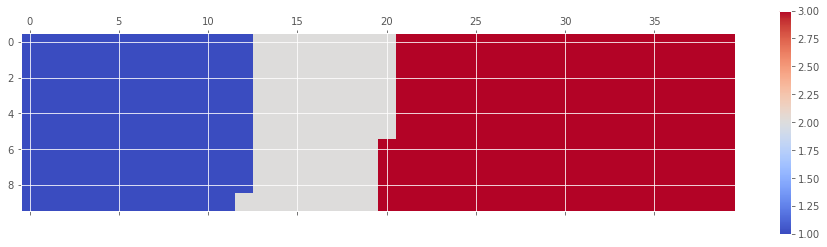

In [13]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6:** Percantik chart

([], [])

<Figure size 432x288 with 0 Axes>

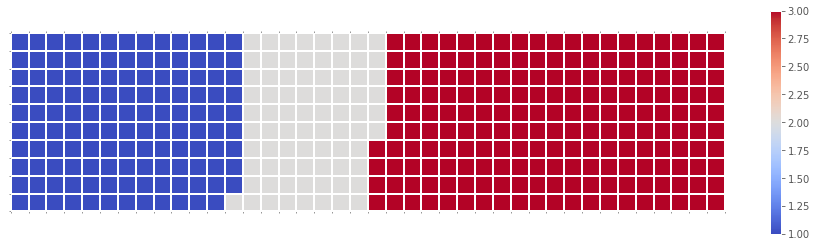

In [14]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7:** Tambahkan Legend

<Figure size 432x288 with 0 Axes>

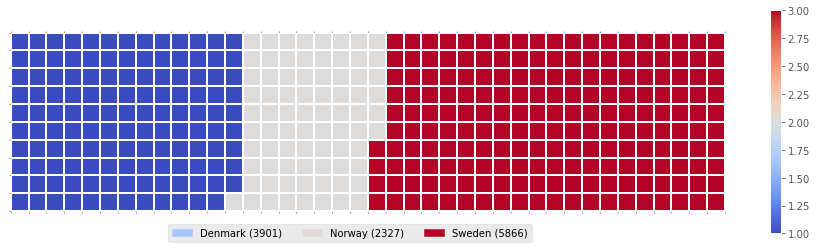

In [15]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of indiidual categories to match color schmes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
#add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

sekarang akan sgt tdk efisien utk mengulangi 7 step setiap ingin membuat waffle chart. kita gabungkan menjadi 1 fungsi create_waffle chart. fungsimengambil parameter:
- categories: unique categories or classes in dataframe
- values: values corresponding to categories or classes
- height: defined height of waffle chart
- width: defined width of waffle chart
- colormap: colormap class
- value_sign: inorder to make our fnction more generalizable, we will add this parameter to address signs that ccould be associated with a value such as %, $, and so on. value_sign has a default valuue of empty string

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    #compute the proportion of each category with respect  to total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    #compuute the total numberr of tiles
    total_num_tiles = width * height #total number of tiles
    print('Total number of tiles is ', total_num_tiles)
    
    #computethe number of tiles for each category
    tiles_per_category =[round(proportion * total_num_tiles) for proportion in category_proportions]

    #print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    #initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    #define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    #populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            #if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ... proceed to the the next category
                category_index += 1

            # set the class value to an int, which increas with class
            waffle_chart[row,col] = category_index
            
    #instantiate a new figure object
    fig = plt.figure()

    #use matshow to display the waffle chart
    colormap= plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    #get the axis
    ax = plt.gca()

    #set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    #add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])
    
    #compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum= np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) -  1]
    
    #create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign +')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
        
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
    #add legend to chart
    plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

dan utk membuat waflle harus memanggil fungsi create_waffle_chart

In [17]:
#menentukan parameterr input
width = 40 #width of chart
height = 10 # height of chart

categories = df_dsn.index.values #categories
values = df_dsn['Total'] #correpondinng values of categories

colormap = plt.cm.coolwarm #color map class

Total number of tiles is  400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

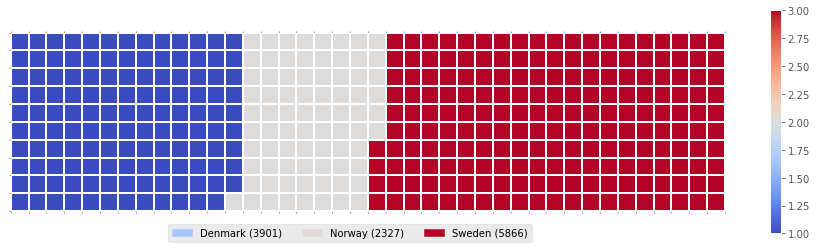

In [18]:
#panggil fungsi
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds
dikenal sebagai text clouds / tag clouds yg bekerja dgn cara sederhana: semakin banyak kata tertentu muncul dlm sumber data tekstual, semakin besar dan tebal kata  itu muncul di cloud.

di python ada word_cloud yaitu package utk menghasilkan word clouds.

kita akan coba, pertama install packagenya

In [20]:
#install wordcloud
!pip install wordcloud

#import package and itsset of stowords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Wordcloud is installed and imported!


wordcclouds biasanya digunakan utk melakukan analisistingkat tinggi & visuaisasi data teks.  mari kita coba analisis novel pendek karangan lewis carrol berjudul alices adventure in wonderland. ayo lanjutkan dan unduh file .txt dr novel

In [22]:
#download file and save as alice_novel.txt
#!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

#open the file and read itinto a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


menggunakan set utk menhapus stopword yg berlebihan

In [23]:
stopwords =set(STOPWORDS)

MEMBUAT WORD CLOUD HANYA DGN MENGGUNAKAN 2000 kata pertama dlm novel

In [25]:
#instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

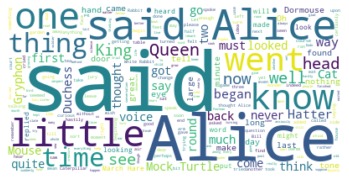

In [26]:
#display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

jadi di 2000 kata perrtama dlm novel, kata yg umum adlh alice, said, little, went dst. mari ubah ukuran cloud sehingga dpt mellihat kata" yg jarang digunakan dgn lbh baik

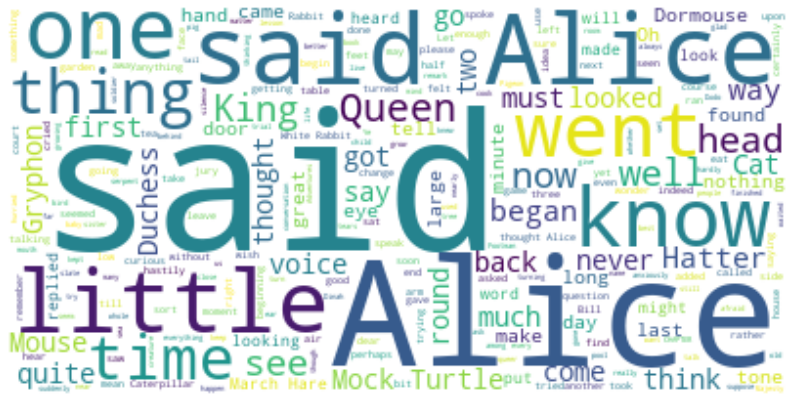

In [27]:
fig = plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) #set height

#display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

jauh lbih baik, tp said bukanlah kata yg informatif. jdi, mari tambahkan ke stopwords kita & buat ulang cloud

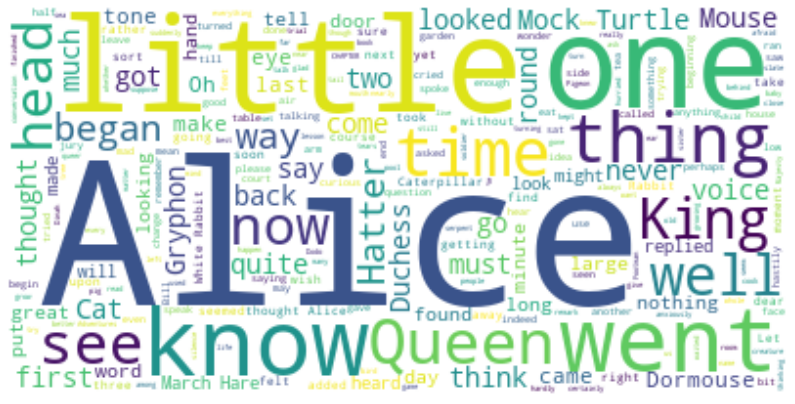

In [28]:
stopwords.add('said') # add the words said to stopwords

#re-generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig = plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) #set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

hal lainnya yg dpt diterapkan dgn package word cloud adalah melapiskan kata" ke mask dlm bentuk apapun. mari kita gunakan alice dan kelincinya. kami sudah membuatkan mask utk kalian, jdi mmari lanjutkan & unduh dan beri nama alice_mask.png

In [29]:
#save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


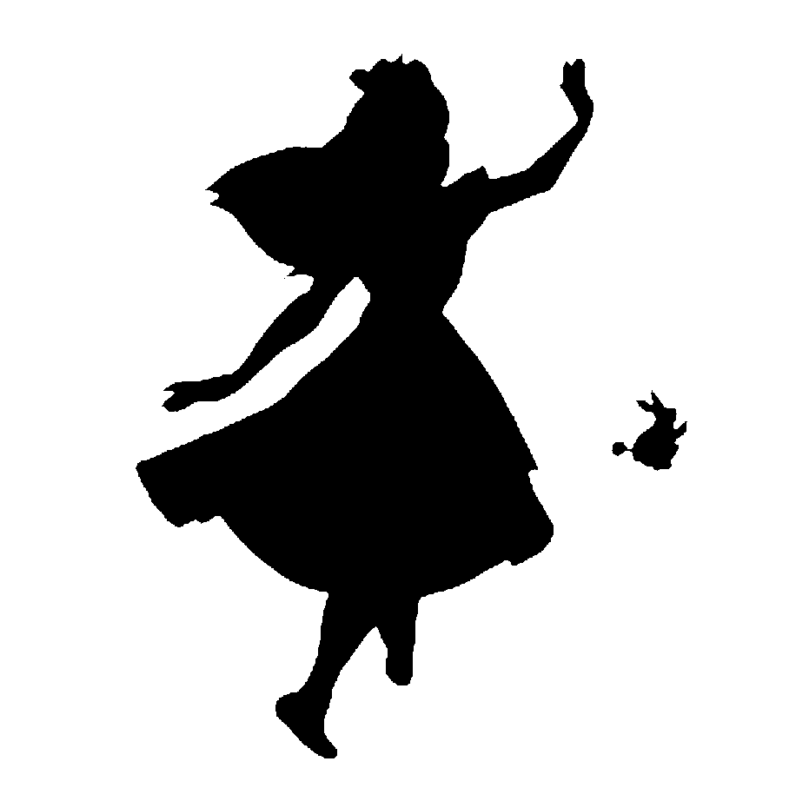

In [30]:
#melihat bagaiana maskingnya terlihat
fig = plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) #set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

membuat word cloud sesuai dgn maskingnya

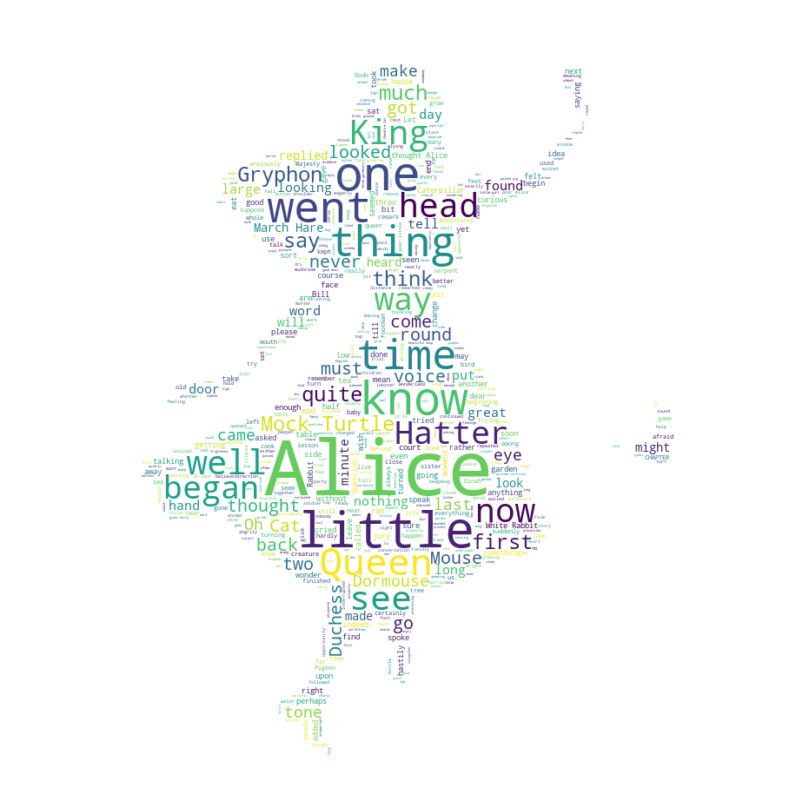

In [32]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig = plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) #set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

sayangnya data keimigrasian tdk memiliki data teks apapun, tapi mari kita buat contoh data teks dr dataset imigrasi kita, katakanlah data teks 90 kata

In [33]:
df_cann.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [35]:
#total imigrasi dr tahun 1980 hingga 2013
total_immigration = df_cann['Total'].sum()
total_immigration

6409153

In [37]:
#menggunakan countries dgn nama satu kata,
#mari duplikat nma masing" negara berdasarkan seberapa besar kontribusi mereka  terhadap total imigrasi
max_words = 90
word_string = ''
for country in df_cann.index.values:
    #check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_cann.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
#display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [38]:
#kita tdk berurusan dgn stopwords apapun disini
#jdi tdk perlu passing saat membuat kata cloud

#create the word cloud
wordcloud =WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


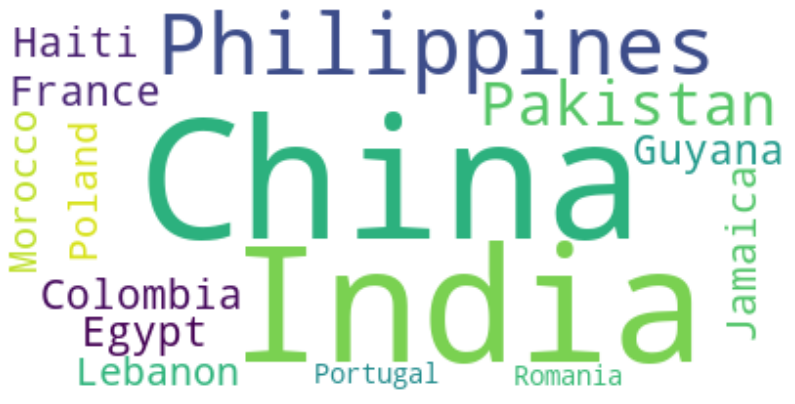

In [40]:
#display the cloud
fig = plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) #set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots
belajar mengenai seaborn

In [41]:
#install seaborn
#!pip install seaborn

#import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


buat dataframe baru yg menyimpan  jumlah total imigran yg mendarat ke kanada per tahun dr 1980 hingga 2013

In [46]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_cann[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


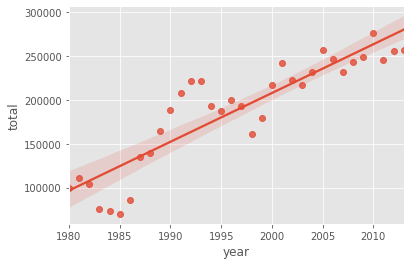

In [47]:
#dgn seaborn, membuat plot regresi semudah memanggil fungsi regplot

ax = sns.regplot(x='year', y='total', data=df_tot)

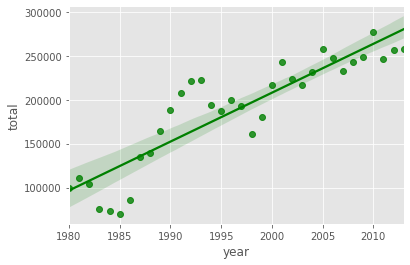

In [48]:
#kita juga dpt menyesuaikan warna scatter plot & garis regresi. contoh ubah menjadi hijau
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

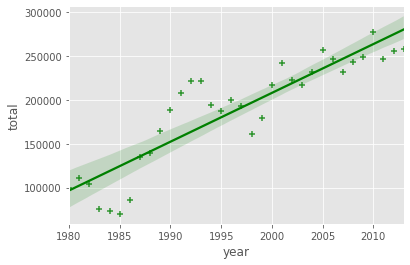

In [49]:
#dpat menyesuaikan bentuk marker, contoh menggunakan'+'
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

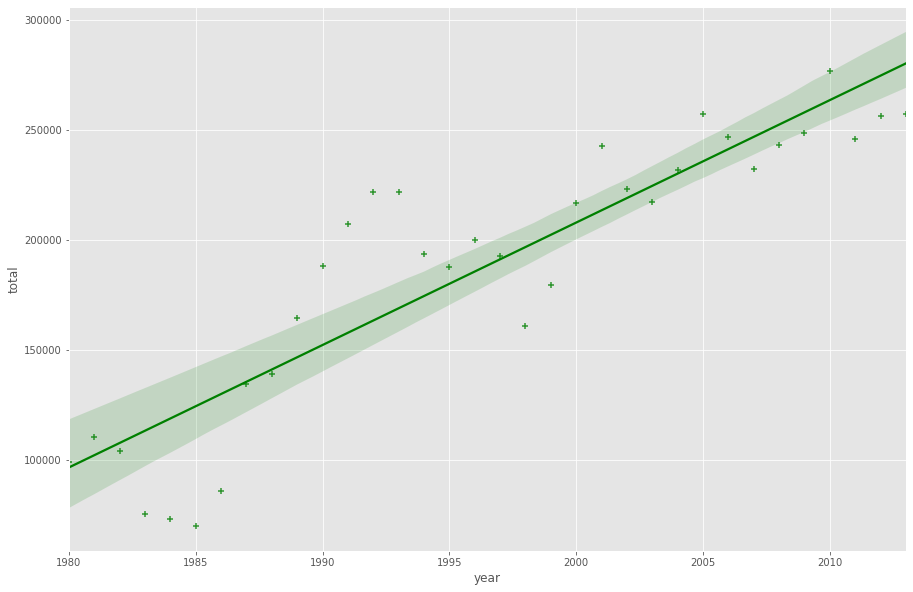

In [50]:
#perbesar plotnya sedikit agar lbh menarik dilihat
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

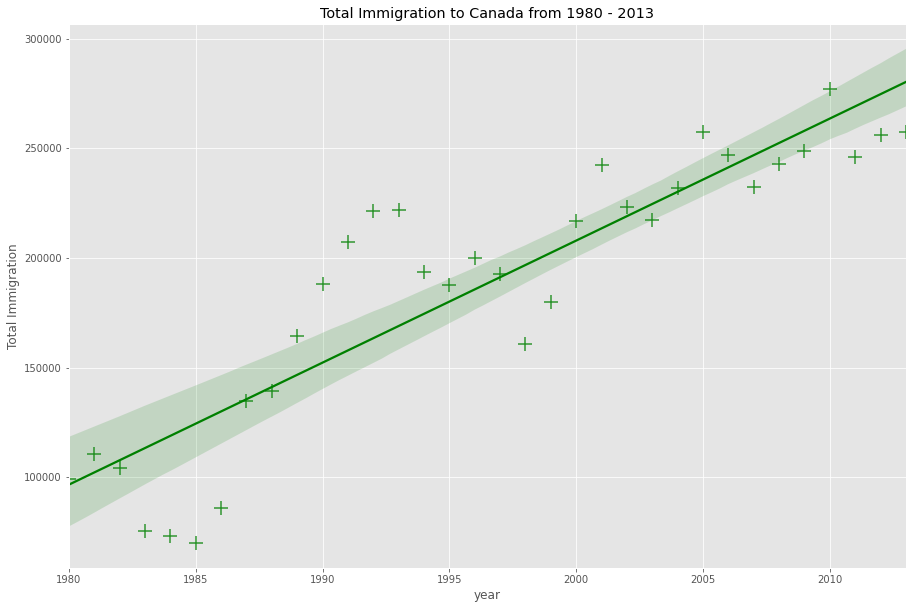

In [51]:
#meningkatkan ukuran marker sehingga cocok dgn ukuran baru gambar tsb
# dan tambahkan judul serta label x dan y
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(label='Year', ylabel='Total Immigration') #add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

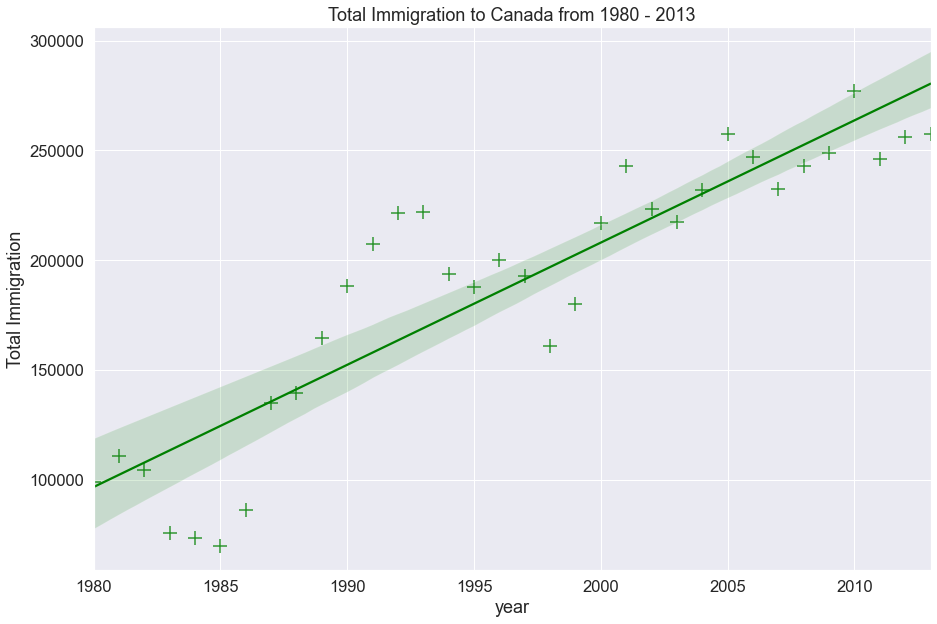

In [54]:
#tingkatkan ukuran font pd label tanda centang, judul, dan label x dan y
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(label='Year', ylabel='Total Immigration') #add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

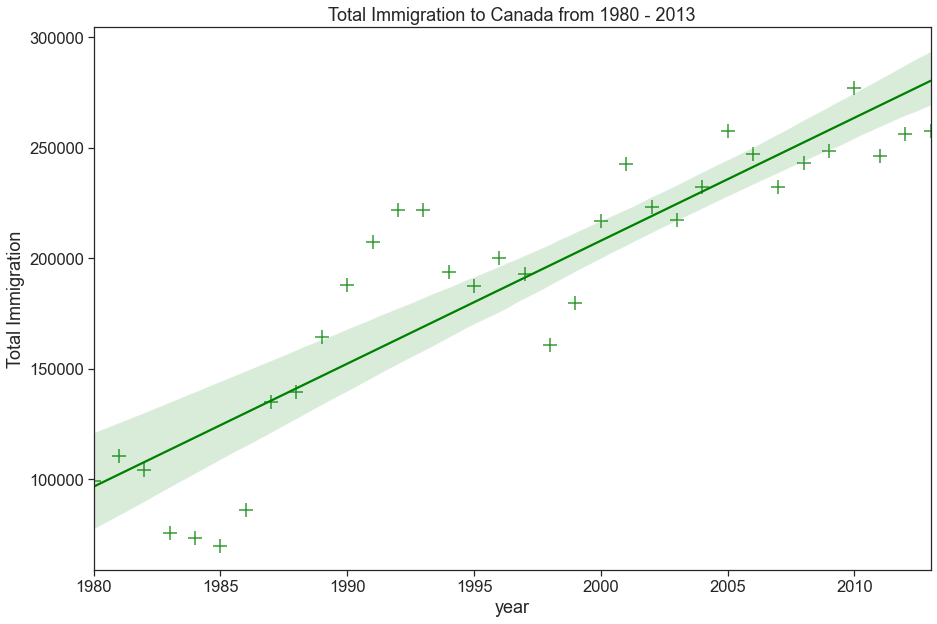

In [55]:
#ubah gaya background polos putih
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') #change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(label='Year', ylabel='Total Immigration') #add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

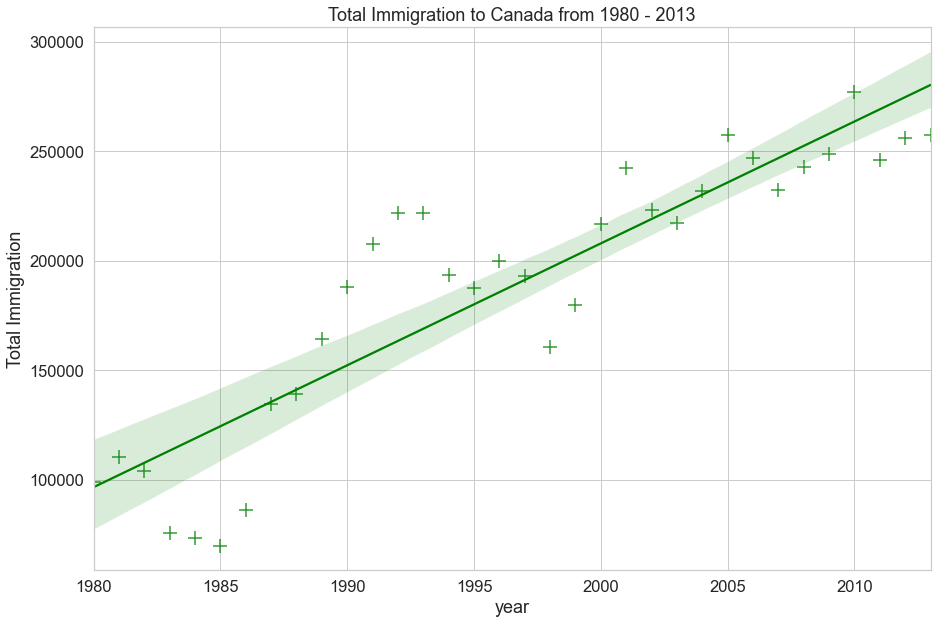

In [56]:
#atau ke background putih dgn garis kisi/grid lines
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(label='Year', ylabel='Total Immigration') #add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

**Question:** use seaborn tocreate a plot with a regression line to visualize the total immigration from denmark, sweden, and norway to canada from 1980-2013

Text(0.5, 1.0, 'Total Immigration from denmark, sweden, and norway to canada from 1980 - 2013')

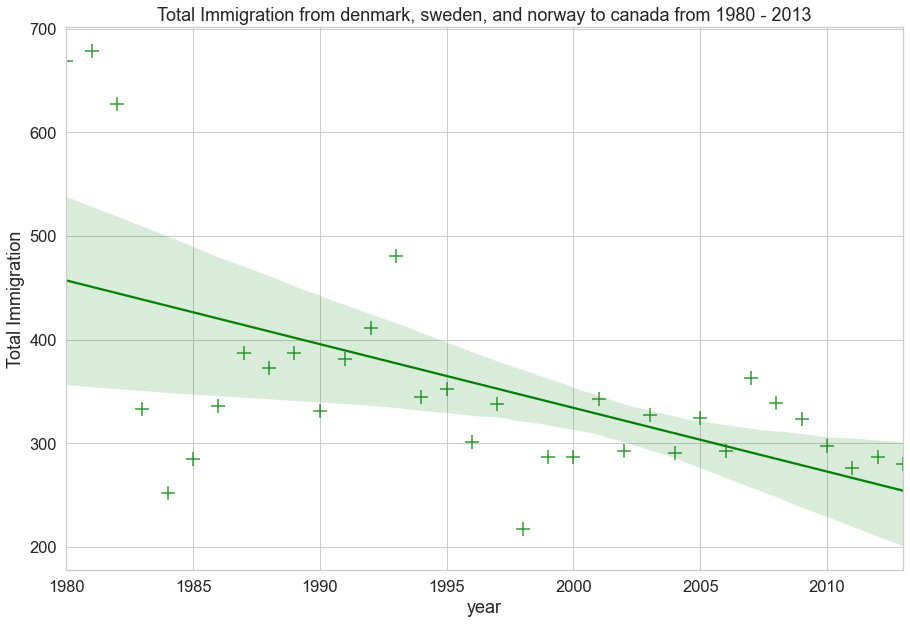

In [59]:
#create df_countries dataframe
df_countries = df_cann.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
#creat df_total by summing across three countries for each year
df_total=pd.DataFrame(df_countries.sum(axis=1))
#reset index in place
df_total.reset_index(inplace=True)
#rename columns
df_total.columns = ['year', 'total']
#change colun year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
#definne figure size
plt.figure(figsize=(15, 10))
#define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
#generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(label='Year', ylabel='Total Immigration') #add x- and y-labels
ax.set_title('Total Immigration from denmark, sweden, and norway to canada from 1980 - 2013') #add title